# Idea
Do some Plotting of singular features

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
from py_dataset import get_all_files_df
from py_dataset import read_in_files
from py_dataset import feature_plotting

In [3]:
data_path = Path('/media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/')
assert data_path.exists()

In [4]:
df = get_all_files_df.main(data_path)
df.head(1)

txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device1/3_thetick_4h/collections.txt
txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device2/1_normal/note.txt
                                           file_path
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...
RangeIndex(start=0, stop=622, step=1)
filetype
csv    530
zip     92
Name: count, dtype: int64
                                           file_path filetype  filesize_bytes
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...      csv           49419
feature_family
SYS_data        92
KERN_data       91
FLS_data        91
RES_data        91
block_data      91
network_data    91
entropy_data    75
Name: count, dtype: int64


file_path filetype  filesize_bytes  \
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...      csv           49419   

  researcher_name device_name experiment feature_family  \
0          Heqing     device1   1_normal     block_data   

               file_name          device  
0  e4_5f_01_68_35_e6.csv  Heqing_device1

#### Get Single data
* device = Heqing_device2 => most data
* go through all features of each feature_family
    * for one 
        1. First: Sum up over all experiments/Malwares/labels first
        2. Then: Then only specific attack in comparison?
            * each column: normalize the data
            * plot boxplot: distribution

In [5]:
single_dev = df[df["device"] == "Heqing_device2"]
assert len(single_dev["device"].unique()) == 1

In [6]:
single_dev_single_data_source = single_dev[single_dev["feature_family"] == "FLS_data"]
assert len(single_dev_single_data_source["feature_family"].unique()) == 1
single_dev_single_data_source.shape

(19, 9)

In [7]:
vectors = read_in_files.get_all_columns_from_single_data_source_for_csv_files(single_dev_single_data_source)

In [8]:
print("len:", len(vectors))
vectors.columns

len: 5166


Index(['seconds', 'connectivity', 'block:block_bio_backmerge',
       'block:block_bio_bounce', 'block:block_bio_complete',
       'block:block_bio_frontmerge', 'block:block_bio_queue',
       'block:block_bio_remap', 'block:block_dirty_buffer',
       'block:block_getrq',
       ...
       'writeback:writeback_single_inode',
       'writeback:writeback_single_inode_start', 'writeback:writeback_start',
       'writeback:writeback_wait', 'writeback:writeback_wait_iff_congested',
       'writeback:writeback_wake_background',
       'writeback:writeback_write_inode',
       'writeback:writeback_write_inode_start',
       'writeback:writeback_written\n', 'experiment'],
      dtype='object', length=180)

In [9]:
vectors.reset_index(inplace=True, drop=True)  # drop: "timestamp"
cols_to_exclude_from_scaling = ["experiment"]

vectors_scaled = feature_plotting.minmax_scale_features(vectors,
                                                        remove_outliers_iqr_all_columns=False,
                                                        cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

vectors_robust_scaled = feature_plotting.minmax_scale_features(vectors,
                                                               remove_outliers_iqr_all_columns=True,
                                                               cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

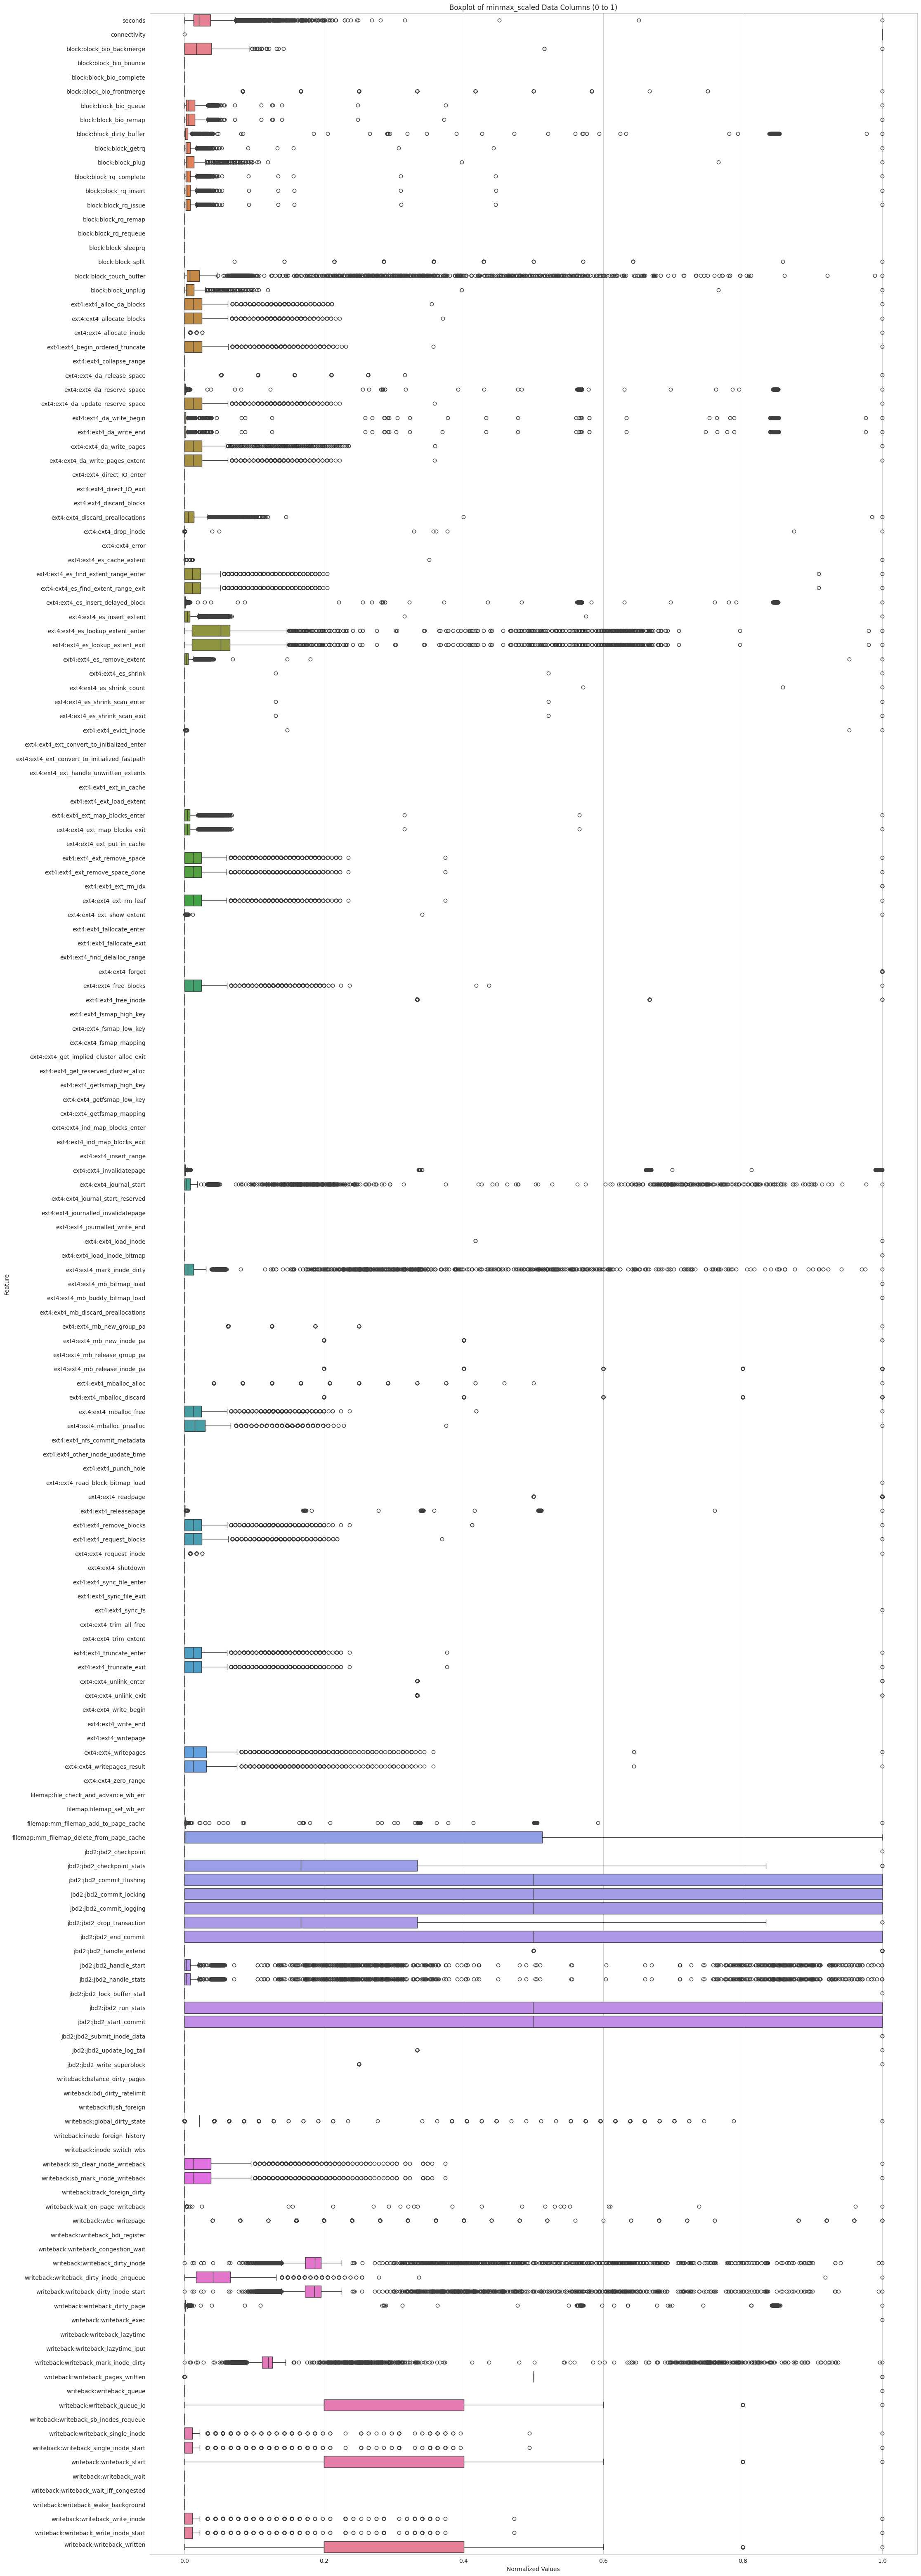

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 80))
sns.boxplot(data=vectors_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('Normalized Values')

plt.title('Boxplot of minmax_scaled Data Columns (0 to 1)')
plt.show()

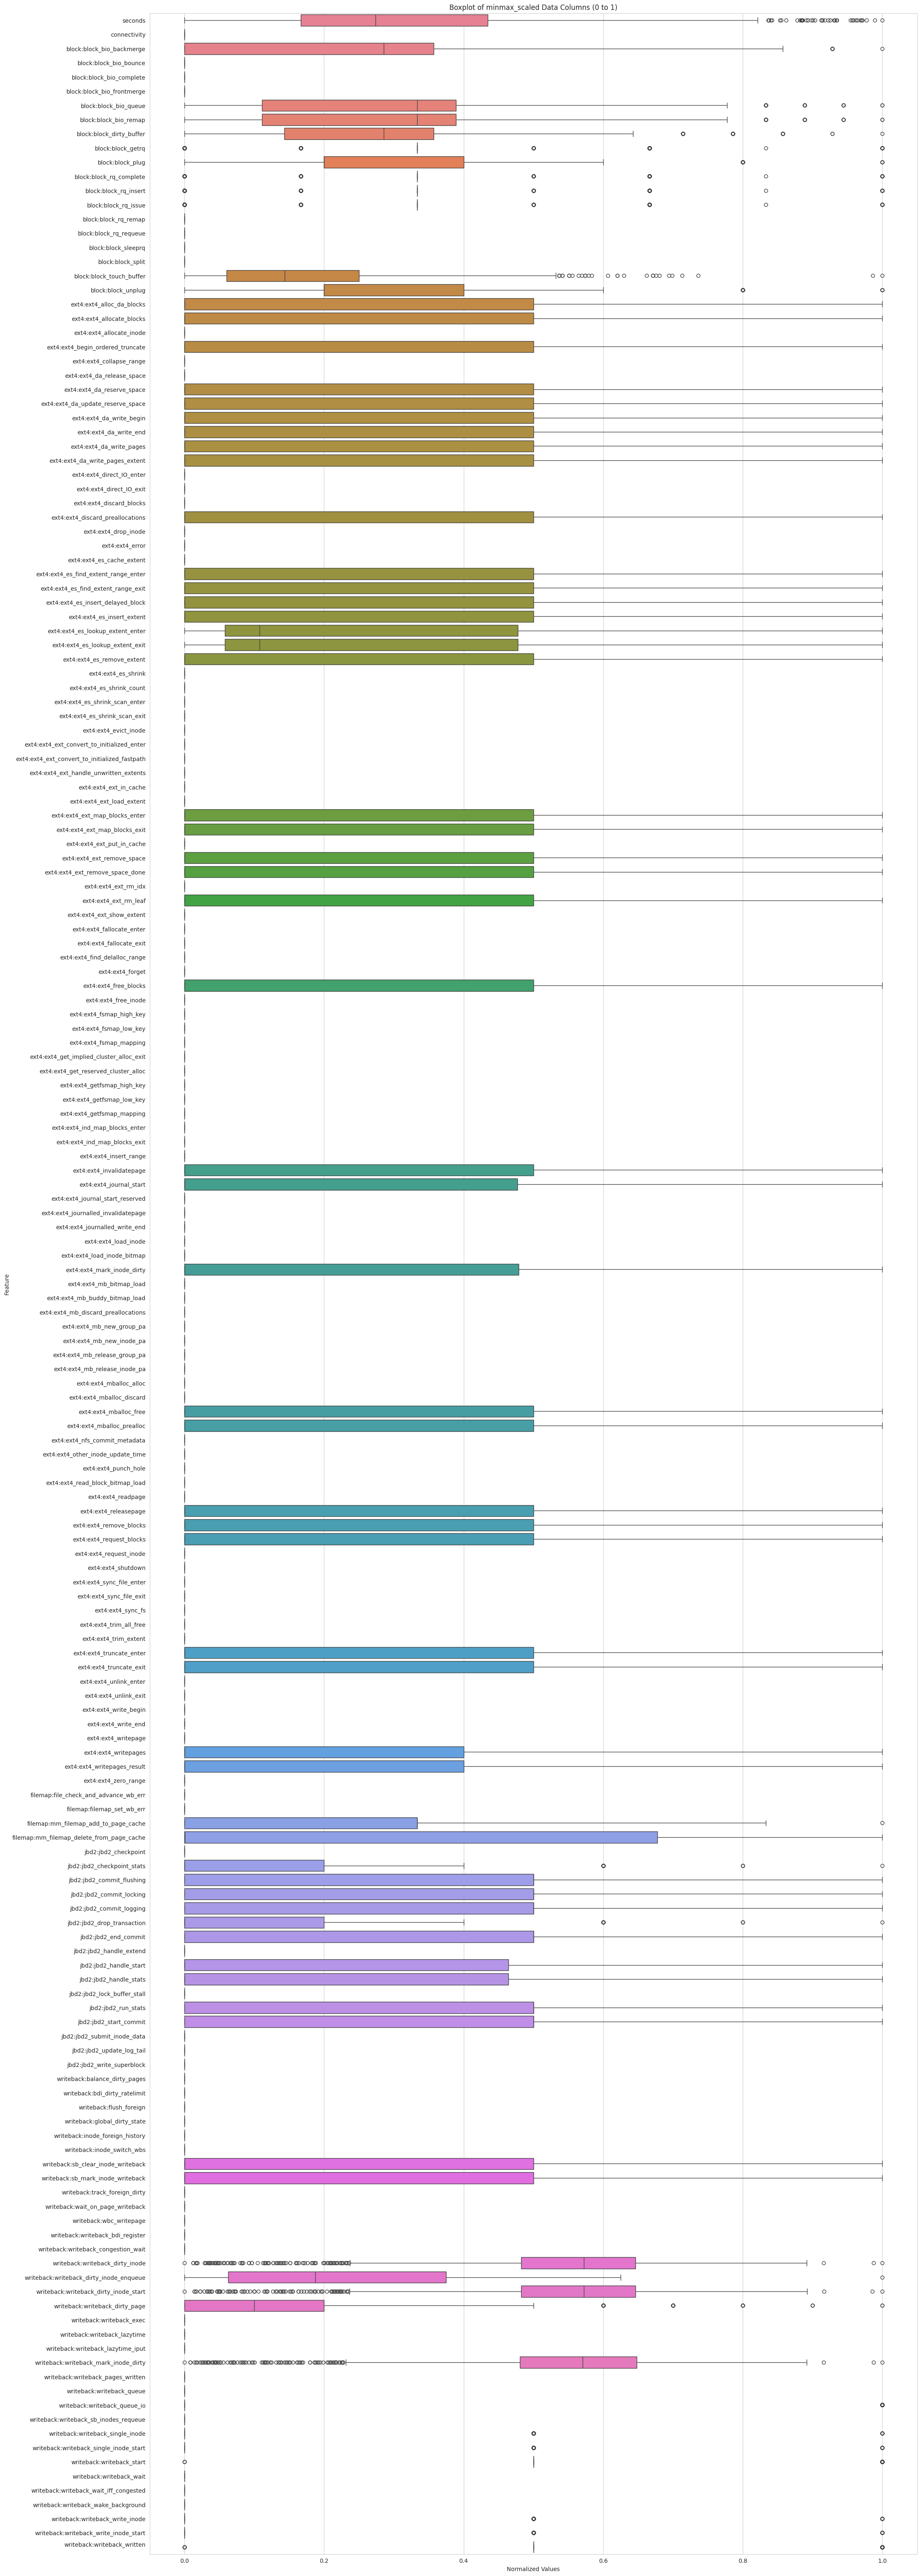

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 80))
sns.boxplot(data=vectors_robust_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('Normalized Values')

plt.title('Boxplot of minmax_scaled Data Columns (0 to 1)')
plt.show()

In [12]:
len(vectors_scaled.columns)

180

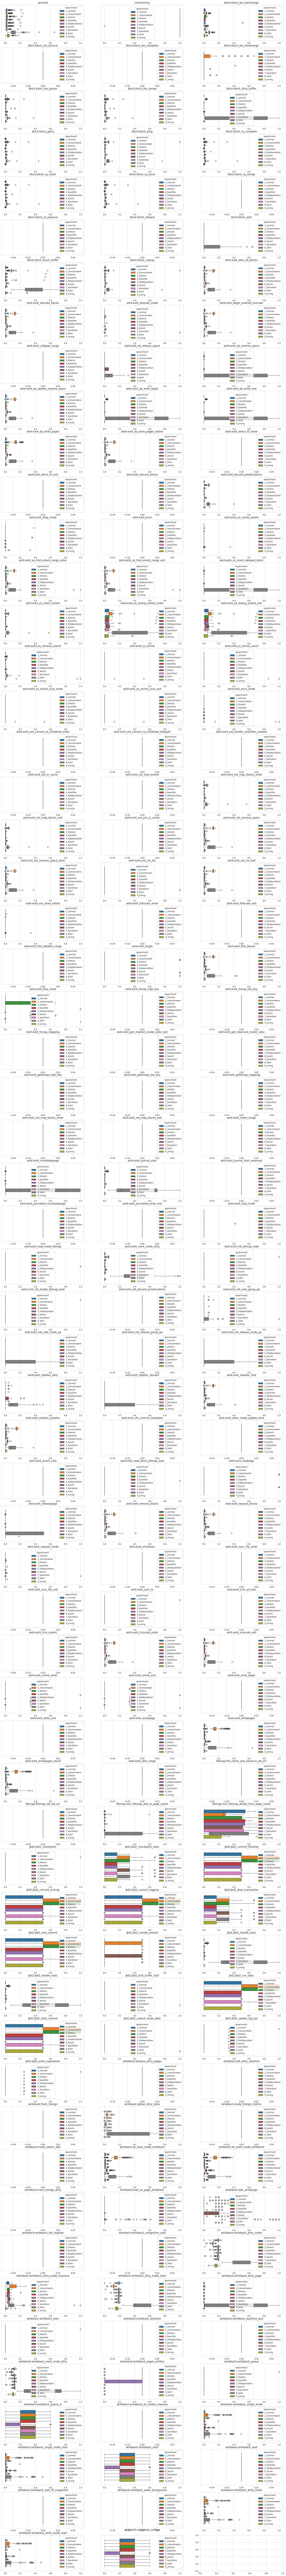

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# sns.boxplot(data=vectors_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

fig, axs = plt.subplots(60, 3, figsize=(24, 220))

# Flatten the axes for easier indexing
axs = axs.flatten()

# labels = vectors_scaled["experiment"].unique()
# handles, labels = axs[0].get_legend_handles_labels()

# Plot each column as a boxplot
for i, column in enumerate(vectors_scaled.columns):
    if column == "experiment":
        continue

    sns.boxplot(data=vectors_scaled, x=column, ax=axs[i], hue="experiment", native_scale=True, orient="h",
                legend=True)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('')

# axs[1].legend(['Survived', 'Not Survived'])

# plt.ylabel('Columns')
# plt.xticks(rotation=45)
# plt.xlabel('Values')
# plt.legend(loc='upper right')
# plt.tight_layout()
# labels = vectors_scaled["experiment"].unique()
# # handles, labels = axs[0].get_legend_handles_labels()
# plt.legend(labels, loc='upper right')
plt.show()

#### Make a narrow dataset

In [14]:
vectors_scaled.head(1)

seconds  connectivity  block:block_bio_backmerge  block:block_bio_bounce  \
0  0.00981           1.0                   0.020761                     0.0   

   block:block_bio_complete  block:block_bio_frontmerge  \
0                       0.0                         0.0   

   block:block_bio_queue  block:block_bio_remap  block:block_dirty_buffer  \
0               0.005533               0.005533                  0.001589   

   block:block_getrq  ...  writeback:writeback_single_inode  \
0            0.00175  ...                               0.0   

   writeback:writeback_single_inode_start  writeback:writeback_start  \
0                                     0.0                        0.2   

   writeback:writeback_wait  writeback:writeback_wait_iff_congested  \
0                       0.0                                     0.0   

   writeback:writeback_wake_background  writeback:writeback_write_inode  \
0                                  0.0                              0.0   

   writeback:writeback_write_inode_start  writeback:writeback_written\n  \
0                                    0.0                            0.2   

   experiment  
0    1_normal  

[1 rows x 180 columns]

In [15]:
narrow_df = pd.melt(vectors_scaled, id_vars=['experiment'], var_name='x', value_name='y')
narrow_df.head(1)

experiment        x        y
0   1_normal  seconds  0.00981

/home/<User>/repos/csg_is/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


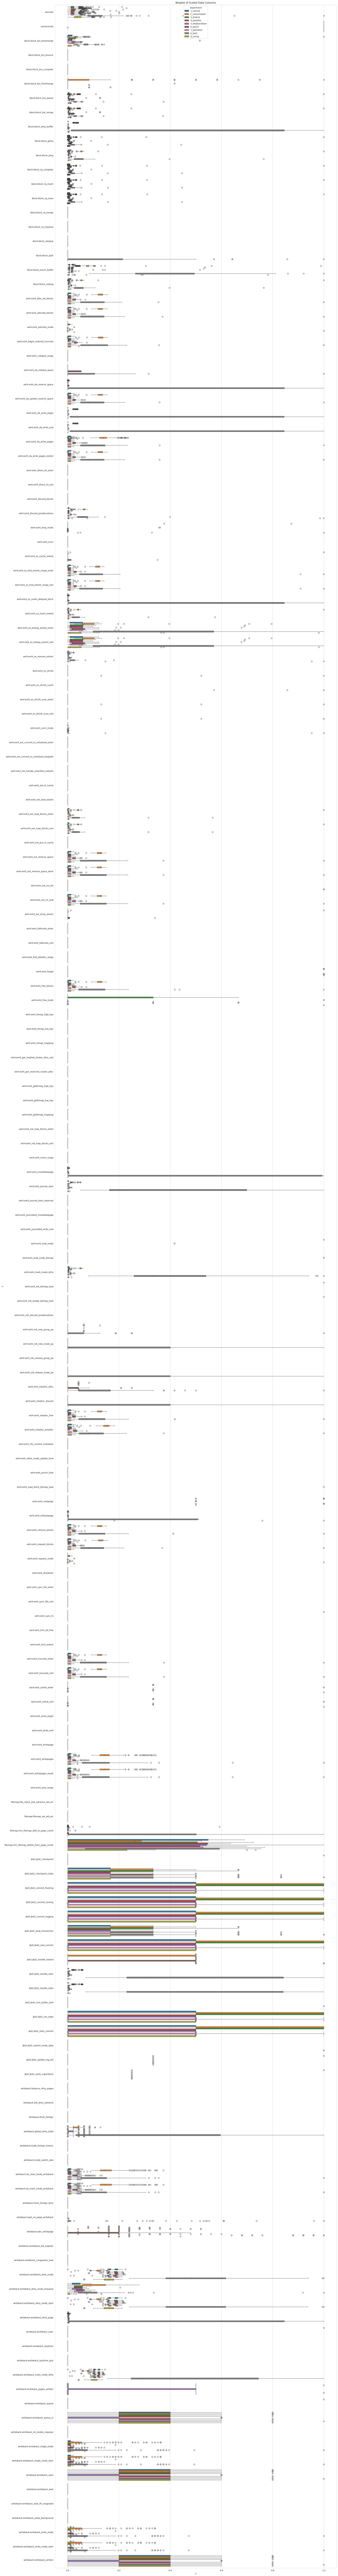

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 220))
# sns.boxplot(data=narrow_df, x="x", y="y"
# hue = "experiment")  # x="class", y="age", legend="full", native_scale=True,
sns.boxplot(data=narrow_df, x="y", y="x", orient="h",
            hue="experiment")

# plt.ylabel('Columns')
# # plt.xticks(rotation=45)
# plt.xlabel('Values')

plt.title('Boxplot of Scaled Data Columns')
plt.show()

In [17]:
assert False, "Stop here, doesnt make sense anyway"

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 90))
# sns.boxplot(data=narrow_df, x="experiment", y="y",  #orient="h",
#             hue="x")  # x="class", y="age", legend="full", native_scale=True,
sns.boxplot(data=narrow_df, x="y", y="x", orient="h",
            hue="experiment")

# plt.ylabel('Columns')
# # plt.xticks(rotation=45)
# plt.xlabel('Values')

plt.title('Boxplot of Scaled Data Columns')
plt.show()

AssertionError: Stop here, doesnt make sense anyway